This project is to predict the mean house price in districts of California. It is a learning project which uses data gathered during the 1990 California census.

Python Function to Retrieve the Data Set

In [1]:
import os
import tarfile
from six.moves import urllib

Python Function to Read the Data Set

In [2]:
import pandas as pd

def readData(housingPath):
    csvPath = os.path.join(housingPath, 'housing.csv')
    return pd.read_csv(csvPath)

In [3]:
housingPath = r'C:\Users\David Olatunji\Desktop\PortFolio\Housing Prediction\datasets\housing'

In [4]:
housing = readData(housingPath) 
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualizing the Data Set

<function matplotlib.pyplot.show(*args, **kw)>

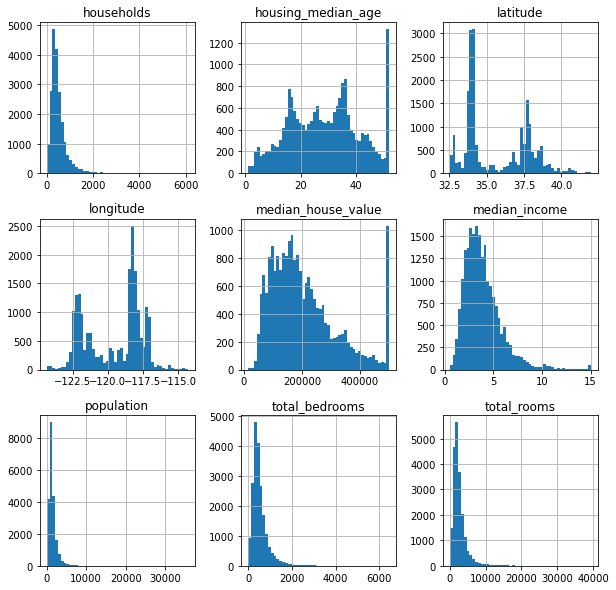

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,10))
plt.show

Splitting the Data Set into Test Set and Train Set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainSet, testSet = train_test_split(housing, test_size=0.2, random_state=42)
print(len(trainSet), 'train +', len(testSet), 'test')

16512 train + 4128 test


Using the Stratified Shufle method to get homogenous samples

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [12]:
housing['incomeCat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

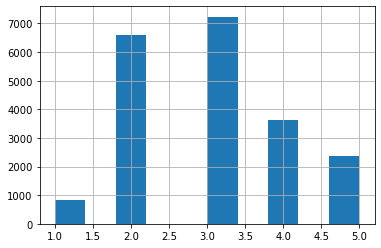

In [13]:
housing['incomeCat'].hist()

In [14]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in split.split(housing, housing['incomeCat']):
    stratTrainSet = housing.loc[trainIndex]
    stratTestSet = housing.loc[testIndex]
    
print(len(stratTrainSet), 'Train +', len(stratTestSet), 'Test =', len(housing), 'Data Set')

16512 Train + 4128 Test = 20640 Data Set


In [15]:
stratTestSet['incomeCat'].value_counts() / len(stratTestSet)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: incomeCat, dtype: float64

In [16]:
for set_ in (stratTrainSet, stratTestSet):
    set_.drop(['incomeCat'], axis=1, inplace=True)

Discovering and Visualizing the Data(Train Set) to Get More Insight

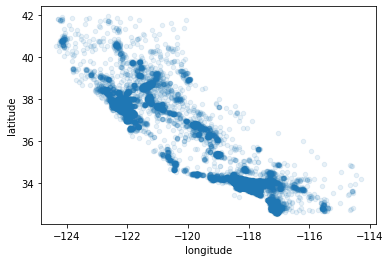

In [17]:
housing = stratTrainSet.copy()
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

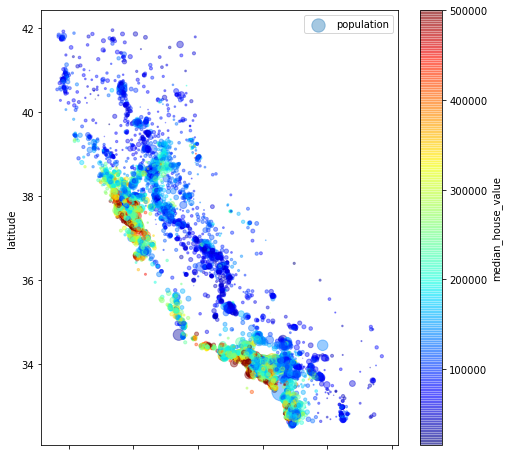

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, label='population',
            colorbar=True, c='median_house_value', s=housing['population']/100,
            cmap=plt.get_cmap('jet'), figsize=(8,8))
plt.legend()

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B4D8E0D5B0>,
      dtype=object)

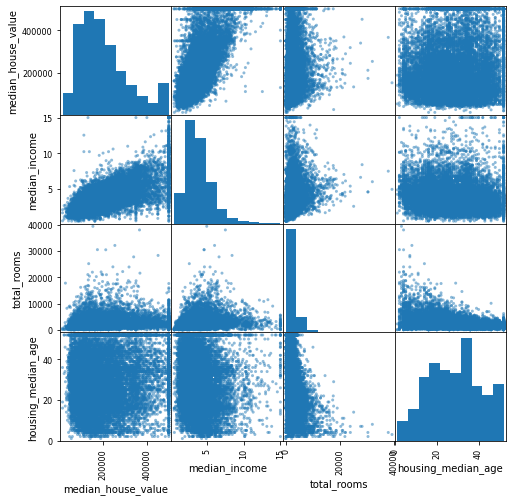

In [20]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(8,8))

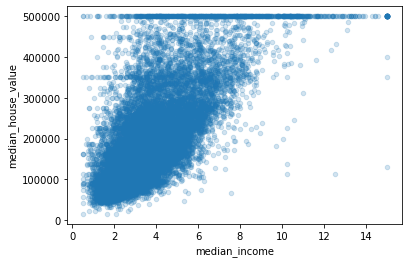

In [21]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

Feature Engineering to Get Better Data Correlations

In [22]:
housing['rooms/household'] = housing['total_rooms'] / housing['households']
housing['bedrooms/room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population/household'] = housing['population'] / housing['households']

In [23]:
housingCorr = housing.corr()
housingCorr['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687160
rooms/household         0.146285
total_rooms             0.135097
housing_median_age      0.114110
households              0.064506
total_bedrooms          0.047689
population/household   -0.021985
population             -0.026920
longitude              -0.047432
latitude               -0.142724
bedrooms/room          -0.259984
Name: median_house_value, dtype: float64

Preparing the Data Set for Machine Learning Algorithms

In [24]:
housing = stratTrainSet.drop('median_house_value', axis=1)
housingLabels = stratTrainSet['median_house_value'].copy()
housingNum = housing.drop('ocean_proximity', axis=1)
housingCat = housing[['ocean_proximity']]

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
numAttribs = list(housingNum)
catAttribs = ['ocean_proximity']

In [27]:
roomsIx, bedroomsIx, populationIx, householdIx = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class combinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, addBedroomsPerRoom = True):
        self.addBedroomsPerRoom = addBedroomsPerRoom
        
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        roomsPerHousehold = X[:, roomsIx] / X[:, householdIx]
        populationPerHousehold = X[:, populationIx] / X[:, householdIx]
        if self.addBedroomsPerRoom:
            bedroomsPerRoom = X[:, bedroomsIx] / X[:, roomsIx]
            return np.c_[X, roomsPerHousehold, populationPerHousehold,
                         bedroomsPerRoom]
        else:
            return np.c_[X, roomsPerHousehold, populationPerHousehold]

attrAdder = combinedAttributesAdder(addBedroomsPerRoom=False)
housingExtraAttribs = attrAdder.transform(housing.values)

In [28]:
numPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribsAdder', combinedAttributesAdder()),
    ('stdScaler', StandardScaler())   
])

In [29]:
fullPipeline = ColumnTransformer([
    ('numPipeline', numPipeline, numAttribs),
    ('catPipeline', OneHotEncoder(), catAttribs)
])

In [30]:
housingPrepared = fullPipeline.fit_transform(housing)

In [31]:
housingPrepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [32]:
housingPrepared.shape

(16512, 16)

In [33]:
housingTr = pd.DataFrame(housingPrepared)
housingTr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


Selecting and Training Models

I. Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linReg = LinearRegression()
linReg.fit(housingPrepared, housingLabels)

LinearRegression()

In [36]:
sampleData = housing.iloc[:5]
sampleLabels = housingLabels.iloc[:5]
preparedSample = fullPipeline.transform(sampleData)

In [37]:
print('Predictions:\t', linReg.predict(preparedSample))
print('Labels:\t\t', list(sampleLabels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Measuring Linear Regression's Performance with RMSE

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
housingPredictions = linReg.predict(housingPrepared)

In [40]:
linRegMSE = mean_squared_error(housingLabels, housingPredictions)

A typical case of underfitting. An error of over $68,000 in the predictions.

In [41]:
linRegRMSE = np.sqrt(linRegMSE)
linRegRMSE

68628.19819848922

Training and Evaluating other Models with RMSE

I. Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
treeReg = DecisionTreeRegressor()
treeReg.fit(housingPrepared, housingLabels)

DecisionTreeRegressor()

A 0.0 RMSE value shows the model is overfitting 

In [44]:
housingPredictions = treeReg.predict(housingPrepared)
treeRegMSE = mean_squared_error(housingLabels, housingPredictions)
treeRegRMSE = np.sqrt(treeRegMSE)
treeRegRMSE

0.0

Cross Validating the Models 

I. Decision Tree Regressor

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treeReg, housingPrepared, housingLabels,
                        scoring = 'neg_mean_squared_error', cv=10)
treeRMSEscores = np.sqrt(-scores)

A validation score of $71,385(+/-2,833)

In [46]:
def displayScores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

displayScores(treeRMSEscores)

Scores: [68637.99490417 65367.25047226 70320.35402602 69535.83719863
 70141.35261641 72946.74248414 70837.17365601 71178.75985627
 75782.46416891 70990.648211  ]
Mean: 70573.85775938428
Standard Deviation: 2560.356512241811


II. Linear Regression

A validation score of $69,052(+/-2731)

In [47]:
linRegScores = cross_val_score(linReg, housingPrepared, housingLabels,
                              scoring = 'neg_mean_squared_error', cv=10)
linRegRMSEscores = np.sqrt(-linRegScores)

displayScores(linRegRMSEscores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983457


III. Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
forestReg = RandomForestRegressor()
forestReg.fit(housingPrepared, housingLabels)

RandomForestRegressor()

In [50]:
housingPredictions = forestReg.predict(housingPrepared)
forestRegMSE = mean_squared_error(housingLabels, housingPredictions)
forestRegRMSE = np.sqrt(forestRegMSE)
forestRegRMSE

18907.633608633518

A validation score of $50,209(+/-1,87)

In [51]:
forestRegScores = cross_val_score(forestReg, housingPrepared, housingLabels,
                                 scoring = 'neg_mean_squared_error', cv=10)
forestRegRMSEscores = np.sqrt(-forestRegScores)

displayScores(forestRegRMSEscores)

Scores: [49346.16570234 47627.64929442 49955.24689652 52612.20606767
 49747.36926763 53121.01781483 48523.23475124 48008.97130007
 53026.17121849 50145.09418421]
Mean: 50211.312649741405
Standard Deviation: 1938.11790449185


Model Finetuning 

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
paramGrid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [54]:
forestReg = RandomForestRegressor()

In [55]:
gridSearch = GridSearchCV(forestReg, paramGrid, cv=5,
                         scoring = 'neg_mean_squared_error',
                         return_train_score = True)

In [56]:
gridSearch.fit(housingPrepared, housingLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
gridSearch.best_params_

{'max_features': 6, 'n_estimators': 30}

In [58]:
gridSearch.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [59]:
cvResult = gridSearch.cv_results_
for meanScore, params in zip(cvResult['mean_test_score'], cvResult['params']):
    print(np.sqrt(-meanScore), params)

64059.167129721805 {'max_features': 2, 'n_estimators': 3}
55243.289567331914 {'max_features': 2, 'n_estimators': 10}
52880.41211261321 {'max_features': 2, 'n_estimators': 30}
60353.692496644675 {'max_features': 4, 'n_estimators': 3}
52973.78189606975 {'max_features': 4, 'n_estimators': 10}
50537.23719645649 {'max_features': 4, 'n_estimators': 30}
58996.65411118483 {'max_features': 6, 'n_estimators': 3}
52229.23381020073 {'max_features': 6, 'n_estimators': 10}
50004.58624947541 {'max_features': 6, 'n_estimators': 30}
59175.16154562594 {'max_features': 8, 'n_estimators': 3}
51930.31178111954 {'max_features': 8, 'n_estimators': 10}
50183.1751165836 {'max_features': 8, 'n_estimators': 30}
62326.952546486864 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54592.056183536966 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60067.46165246791 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52944.536979005024 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [60]:
featureImportances = gridSearch.best_estimator_.feature_importances_
featureImportances

array([6.90633408e-02, 6.48006502e-02, 4.36926372e-02, 1.68749594e-02,
       1.75187383e-02, 1.77699454e-02, 1.69786895e-02, 3.47104488e-01,
       5.04897218e-02, 1.08631188e-01, 9.26712287e-02, 1.23561070e-02,
       1.30268007e-01, 4.59651813e-05, 4.87828549e-03, 6.85604901e-03])

In [61]:
extraAttribs = ['roomsPerHousehold', 'populationPerHousehold', 'bedroomsPerRoom']
catEncoder = fullPipeline.named_transformers_['catPipeline']
catOneHotAttribs = list(catEncoder.categories_[0])
attributes = numAttribs + extraAttribs + catOneHotAttribs
sorted(zip(featureImportances, attributes), reverse=True)

[(0.3471044875486049, 'median_income'),
 (0.1302680068282954, 'INLAND'),
 (0.10863118752457153, 'populationPerHousehold'),
 (0.09267122869366928, 'bedroomsPerRoom'),
 (0.06906334078271512, 'longitude'),
 (0.0648006501920142, 'latitude'),
 (0.05048972184782775, 'roomsPerHousehold'),
 (0.04369263721823102, 'housing_median_age'),
 (0.017769945413817552, 'population'),
 (0.017518738334265916, 'total_bedrooms'),
 (0.0169786894636509, 'households'),
 (0.016874959431208345, 'total_rooms'),
 (0.012356107038040737, '<1H OCEAN'),
 (0.006856049009586858, 'NEAR OCEAN'),
 (0.0048782854921773635, 'NEAR BAY'),
 (4.596518132310161e-05, 'ISLAND')]

Evaluating the System on the Test Set

In [62]:
finalModel = gridSearch.best_estimator_
Xtest = stratTestSet.drop('median_house_value', axis=1)
Ytest = stratTestSet['median_house_value'].copy()

In [63]:
XtestPrepared = fullPipeline.transform(Xtest)
finalPredictions = finalModel.predict(XtestPrepared)

In [64]:
finalMSE = mean_squared_error(Ytest, finalPredictions)
finalRMSE = np.sqrt(finalMSE)

In [65]:
finalRMSE

48321.544354001344

95% Confidence Interval Computation for the Generalization Error

In [66]:
from scipy import stats

In [67]:
confidence = 0.95
squaredErrors = (finalPredictions - Ytest) ** 2

In [68]:
np.sqrt(stats.t.interval(confidence, len(squaredErrors) - 1,
                        loc = squaredErrors.mean(),
                        scale = stats.sem(squaredErrors)))

array([46367.2624621 , 50199.80347852])